In [1]:
from pyod.utils import generate_data
from pytod.models.abod import ABOD
from pytod.models.ecod import ECOD
from pytod.models.hbos import HBOS
from pytod.models.knn import KNN
from pytod.models.lof import LOF
from pytod.models.pca import PCA
from pyod.models.abod import ABOD as ABOD_PyOD
from pyod.models.ecod import ECOD as ECOD_PyOD
from pyod.models.hbos import HBOS as HBOS_PyOD
from pyod.models.knn import KNN as KNN_PyOD
from pyod.models.lof import LOF as LOF_PyOD
from pyod.models.pca import PCA as PCA_PyOD
import time, os, torch, sys
from matplotlib import pyplot as plt
from pytod.utils.utility import validate_device

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
pyod_times = []
pytod_times = []

# ABOD

In [3]:


contamination = 0.1  # percentage of outliers
n_train = 10000  # number of training points
n_test = 5000  # number of testing points
n_features = 20
k = 10

# Generate sample data
X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

clf_name = 'ABOD-PyOD'
clf = ABOD_PyOD(n_neighbors=k)
start = time.time()
clf.fit(X_train)
end = time.time()
pyod_time = end - start
print('PyOD execution time', pyod_time)

X_train, y_train, X_test, y_test = torch.from_numpy(X_train), \
                                   torch.from_numpy(y_train), \
                                   torch.from_numpy(X_test), \
                                   torch.from_numpy(y_test)


# try to access the GPU, fall back to cpu if no gpu is available
device = validate_device(0)
# device = 'cpu'
clf = ABOD(n_neighbors=k, batch_size=10000, device=device)
# clf = ABOD(n_neighbors=k, batch_size=None, device=device)
start = time.time()
clf.fit(X_train)
end = time.time()
tod_time = end - start
print('TOD execution time', tod_time)

print('TOD is', round(pyod_time / tod_time, ndigits=2),
      'times faster than PyOD')

pyod_times.append(pyod_time)
pytod_times.append(tod_time)

PyOD execution time 3.3375329971313477
TOD execution time 0.8804013729095459
TOD is 3.79 times faster than PyOD


# HBOS

In [4]:
contamination = 0.1  # percentage of outliers
n_train = 500000  # number of training points
n_test = 5000  # number of testing points
n_features = 1000
k = 10

# Generate sample data
X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

clf = HBOS_PyOD()
start = time.time()
clf.fit(X_train)
end = time.time()

print('PyOD execution time', pyod_time)

X_train, y_train, X_test, y_test = torch.from_numpy(X_train), \
                                   torch.from_numpy(y_train), \
                                   torch.from_numpy(X_test), \
                                   torch.from_numpy(y_test)

# try to access the GPU, fall back to cpu if no gpu is available
device = validate_device(0)

clf = HBOS(device=device)
# clf = HBOS(n_neighbors=k, batch_size=None, device=device)
start = time.time()
clf.fit(X_train)
end = time.time()
tod_time = end - start
print('TOD execution time', tod_time)

print('TOD is', round(pyod_time / tod_time, ndigits=2),
      'times faster than PyOD')

pyod_times.append(pyod_time)
pytod_times.append(tod_time)

PyOD execution time 3.3375329971313477


E:\jjy\class\2023-2024 1\模式识别\模式识别+1193210320+金家耀\相关代码\pytod\models\hbos.py:118: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at  C:/actions-runner/_work/pytorch/pytorch/builder/windows/pytorch/aten/src\ATen/native/BucketizationUtils.h:35.)
  bin_inds = torch.bucketize(X[:, i], bin_edges[:, i])
E:\jjy\class\2023-2024 1\模式识别\模式识别+1193210320+金家耀\相关代码\pytod\models\hbos.py:118: UserWarning: torch.searchsorted(): boundary tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous boundary tensor if possible. This message will only appear once per program. (Triggered internally at  C:/actions-runner/_work/pytorch/pytorch/builder/windows/pyto

TOD execution time 5.612387180328369
TOD is 0.59 times faster than PyOD


# KNN

In [5]:
contamination = 0.1  # percentage of outliers
n_train = 30000  # number of training points
n_test = 5000  # number of testing points
n_features = 20
k = 10

# Generate sample data
X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

clf = KNN_PyOD(n_neighbors=k)
start = time.time()
clf.fit(X_train)
end = time.time()
pyod_time = end - start
print('Execution time', end - start)

X_train, y_train, X_test, y_test = torch.from_numpy(X_train), \
                                   torch.from_numpy(y_train), \
                                   torch.from_numpy(X_test), \
                                   torch.from_numpy(y_test)


# try to access the GPU, fall back to cpu if no gpu is available
device = validate_device(0)
# clf = KNN(n_neighbors=k, batch_size=10000, device=device)
clf = KNN(n_neighbors=k, batch_size=10000, device=device)
start = time.time()
clf.fit(X_train)
end = time.time()
tod_time = end - start
print('Execution time', end - start)

print('TOD is', round(pyod_time / tod_time, ndigits=2),
      'times faster than PyOD')

pyod_times.append(pyod_time)
pytod_times.append(tod_time)

Execution time 0.5578041076660156
Total number of batches 9
Execution time 2.7964813709259033
TOD is 0.2 times faster than PyOD


# LOF

In [6]:
contamination = 0.1  # percentage of outliers
n_train = 30000  # number of training points
n_test = 5000  # number of testing points
n_features = 20
k = 10

# Generate sample data
X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

clf = LOF_PyOD(n_neighbors=k)
start = time.time()
clf.fit(X_train)
end = time.time()
pyod_time = end - start
print('PyOD execution time', pyod_time)

X_train, y_train, X_test, y_test = torch.from_numpy(X_train), \
                                   torch.from_numpy(y_train), \
                                   torch.from_numpy(X_test), \
                                   torch.from_numpy(y_test)

print()
print()
# try to access the GPU, fall back to cpu if no gpu is available
device = validate_device(0)

clf = LOF(n_neighbors=k, batch_size=10000, device=device)
# clf = LOF(n_neighbors=k, batch_size=None, device=device)
start = time.time()
clf.fit(X_train)
end = time.time()
tod_time = end - start
print('TOD execution time', tod_time)

print('TOD is', round(pyod_time / tod_time, ndigits=2),
      'times faster than PyOD')


pyod_times.append(pyod_time)
pytod_times.append(tod_time)

PyOD execution time 0.5156254768371582


Total number of batches 9
TOD execution time 1.0053284168243408
TOD is 0.51 times faster than PyOD


# PCA

In [7]:
contamination = 0.1  # percentage of outliers
n_train = 1000000  # number of training points
n_test = 5000  # number of testing points
n_features = 200
k = 10

# Generate sample data
X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

clf = PCA_PyOD(n_components=5)
start = time.time()
clf.fit(X_train)
end = time.time()
pyod_time = end - start
print('PyOD execution time', pyod_time)

X_train, y_train, X_test, y_test = torch.from_numpy(X_train), \
                                   torch.from_numpy(y_train), \
                                   torch.from_numpy(X_test), \
                                   torch.from_numpy(y_test)

# try to access the GPU, fall back to cpu if no gpu is available
device = validate_device(0)

clf = PCA(n_components=k, device=device)
# clf = PCA(n_neighbors=k, batch_size=None, device=device)
start = time.time()
clf.fit(X_train)
end = time.time()
tod_time = end - start
print('TOD execution time', tod_time)

print('TOD is', round(pyod_time / tod_time, ndigits=2),
      'times faster than PyOD')

pyod_times.append(pyod_time)
pytod_times.append(tod_time)

PyOD execution time 8.602738380432129
TOD execution time 1.7770330905914307
TOD is 4.84 times faster than PyOD


# ECOD

In [8]:
contamination = 0.1  # percentage of outliers
n_train = 10000  # number of training points
n_test = 5000  # number of testing points
n_features = 5000
k = 10

# Generate sample data
X_train, X_test, y_train, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

clf = ECOD_PyOD()
start = time.time()
clf.fit(X_train)
end = time.time()

pyod_time = end - start
print('PyOD execution time', pyod_time)

X_train, y_train, X_test, y_test = torch.from_numpy(X_train), \
                                   torch.from_numpy(y_train), \
                                   torch.from_numpy(X_test), \
                                   torch.from_numpy(y_test)

# try to access the GPU, fall back to cpu if no gpu is available
device = validate_device(0)
# device = 'cpu'
clf = ECOD(device=device)
start = time.time()
clf.fit(X_train)
end = time.time()

tod_time = end - start
print('TOD execution time', tod_time)

print('TOD is', round(pyod_time / tod_time, ndigits=2),
      'times faster than PyOD')

pyod_times.append(pyod_time)
pytod_times.append(tod_time)

PyOD execution time 15.597042560577393
TOD execution time 0.8693544864654541
TOD is 17.94 times faster than PyOD


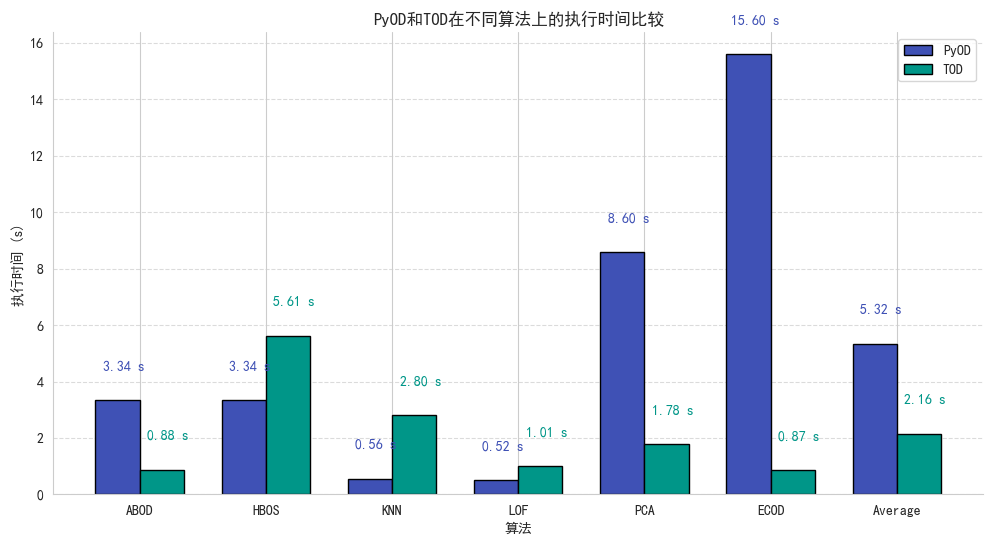

In [15]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['ABOD', 'HBOS', 'KNN', 'LOF', 'PCA', 'ECOD', 'Average']
pyod_average = np.mean(pyod_times)
pyod_times.append(pyod_average)

tod_average = np.mean(pytod_times)
pytod_times.append(tod_average)

bar_width = 0.35
bar_positions_pyod = np.arange(len(algorithms))
bar_positions_tod = bar_positions_pyod + bar_width

plt.figure(figsize=(12, 6))

# Plotting PyOD execution times as bars
pyod_bars = plt.bar(bar_positions_pyod, pyod_times, width=bar_width, label='PyOD', color='#3F51B5', edgecolor='black', linewidth=1)

# Plotting TOD execution times as bars
tod_bars = plt.bar(bar_positions_tod, pytod_times, width=bar_width, label='TOD', color='#009688', edgecolor='black', linewidth=1)

# Annotating PyOD bars with values
for bar in pyod_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 + 0.05, yval + 1, f'{yval:.2f} s', ha='center', va='bottom', color='#3F51B5', fontweight='bold')

# Annotating TOD bars with values
for bar in tod_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 + 0.05, yval + 1, f'{yval:.2f} s', ha='center', va='bottom', color='#009688', fontweight='bold')

plt.xlabel('算法')
plt.ylabel('执行时间 (s)')
plt.title('PyOD和TOD在不同算法上的执行时间比较')
plt.legend()

plt.xticks(bar_positions_pyod + bar_width / 2, algorithms)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
